<center>
    <h1><b>Wine Classification Using Naive Bayes</b></h1>
    ---------------------------------------------
</center>

Use wine dataset from sklearn to classify wines into 3 ctegories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import pickle as pk

%matplotlib inline

In [2]:
# Loading the wine dataset
wine = load_wine()

In [3]:
# Checking the attributes of the data
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
# Converting the data to dataframe
df = pd.DataFrame(wine.data, columns = wine.feature_names)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# Adding class column to the dtabase
df['class'] = wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# Checking relationship between columns
relationship = df.corr()
relationship

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [9]:
# Verifying the unique values in class column
df['class'].unique()

array([0, 1, 2])

In [10]:
# Checking if there are null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [11]:
# Splitng the data to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.2, random_state = 0)

In [12]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [13]:
df.shape

(178, 14)

## Gaussian Model

In [14]:
# Building gaussian model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
# Evaluating gaussian model
model.score(X_test, y_test)

0.9166666666666666

In [16]:
y_test[:10]

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
Name: class, dtype: int32

In [17]:
model.predict(X_test[:10])

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1])

## Multinomial Model

In [18]:
# Building multinomil model
model2 = MultinomialNB()
model2.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Evaluating multinomial model
model2.score(X_test, y_test)

0.8611111111111112

In [20]:
y_test[:10]

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
Name: class, dtype: int32

In [21]:
model2.predict(X_test[:10])

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1])

### Confusion Matrix

In [22]:
# Checking areas where there are errors with confusion matrix
y_predict = model.predict(X_test)
y_predict2 = model2.predict(X_test)

In [23]:
con_matrix = confusion_matrix(y_test, y_predict)
con_matrix

array([[14,  0,  0],
       [ 2, 13,  1],
       [ 0,  0,  6]], dtype=int64)

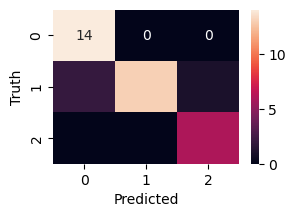

In [24]:
# Visualizing the Confusion Matrix Output
plt.figure(figsize = [3,2])
sb.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [25]:
# Checkng where there are errors in the model2 using confusion matrix
con_matrix2 = confusion_matrix(y_test, y_predict2)
con_matrix2

array([[13,  1,  0],
       [ 0, 13,  3],
       [ 1,  0,  5]], dtype=int64)

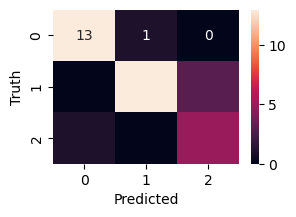

In [26]:
# Visualizing the Confusion Matrix Output
plt.figure(figsize = [3,2])
sb.heatmap(con_matrix2, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

### Saving The Model

In [27]:
# Saving the better model as pickle file
with open('model_wine_NaiveBayes', 'wb') as f:
    pk.dump(model, f)